In [1]:
from pathlib import Path
import re
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import gzip
import pickle

sns.set_style("whitegrid")
sns.set_context("notebook")

In [2]:
from src.data.make_dataset import load_trace_file

In [3]:
building_id = "5a0546857ecc773753327266"
floor_id = "B1"
trace_id = "5e15bf91f4c3420006d52341"

trace_file = (
    Path(".")
    / ".."
    / "data"
    / "raw"
    / "train"
    / building_id
    / floor_id
    / f"{trace_id}.txt"
)

In [1]:
data_frames = load_trace_file(trace_file)

NameError: name 'load_trace_file' is not defined

In [12]:
%%timeit
with open(trace_file.with_suffix(".pkl"), "wb") as f:
    pickle.dump(data_frames, f)

3.75 ms ± 230 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit
with gzip.open(trace_file.with_suffix(".pkl.gz"), "wb") as f:
    pickle.dump(data_frames, f)

158 ms ± 882 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
%%timeit
with open(trace_file.with_suffix(".pkl"), "rb") as f:
    pickle.load(f)

5.23 ms ± 319 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%%timeit
with gzip.open(trace_file.with_suffix(".pkl.gz"), "rb") as f:
    pickle.load(f)

8.64 ms ± 584 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
raw = pd.read_csv(trace_file, comment="#", header=None)

groups = (
    raw[0]
        .str
        .split("\t", n=2, expand=True)
        .groupby(1)
    )

In [16]:
data_frames = {}

for name, df in groups:

    time = pd.to_timedelta((df[0].astype(int) - start_time), unit="ns")
    data = df[2].str.split("\t", expand=True)

    out = data.set_index(time)
    out.index.name = "time"
    out.columns = data_descriptions[name].keys()
    out = out.astype(data_descriptions[name])

    data_frames[name] = out

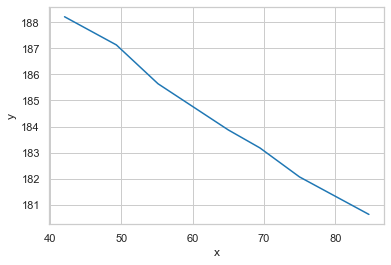

In [17]:
sns.lineplot(data=data_frames["TYPE_WAYPOINT"], x="x", y="y", sort=False);

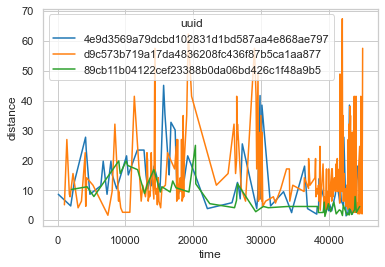

In [18]:
sns.lineplot(data=data_frames["TYPE_BEACON"], x="time", y="distance", hue="uuid");

<AxesSubplot:xlabel='time'>

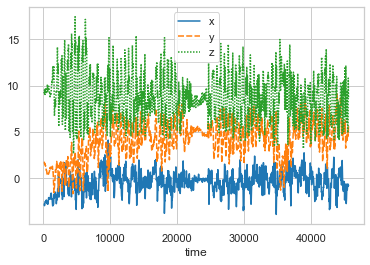

In [19]:
sns.lineplot(data=data_frames["TYPE_ACCELEROMETER"][["x", "y", "z"]])

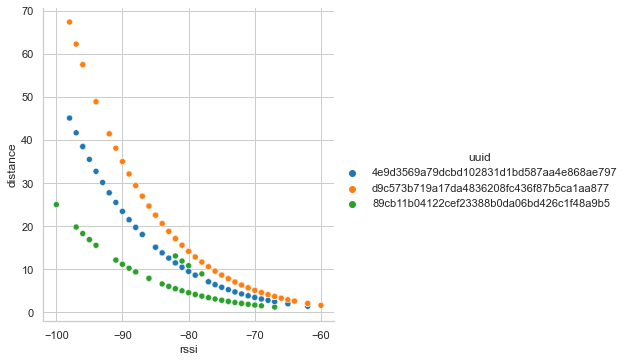

In [20]:
sns.relplot(data=data_frames["TYPE_BEACON"], x="rssi", y="distance", hue="uuid")

<AxesSubplot:xlabel='time'>

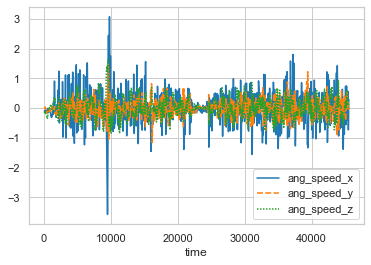

In [21]:
sns.lineplot(data=data_frames["TYPE_GYROSCOPE"][["ang_speed_x", "ang_speed_y", "ang_speed_z"]])

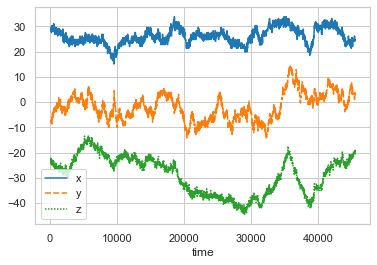

In [22]:
sns.lineplot(data=data_frames["TYPE_MAGNETIC_FIELD"][["x", "y", "z"]]);

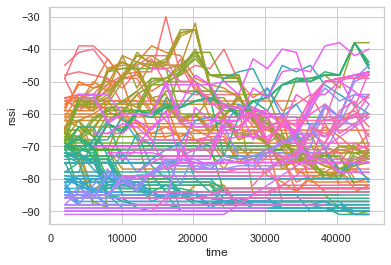

In [23]:
sns.lineplot(
    data=data_frames["TYPE_WIFI"], x="time", y="rssi", hue="bssid", legend=None
)


In [74]:
with open("text.pkl", "wb") as f:
    pickle.dump(data_frames, f)

In [ ]:
%%timeit
with gzip.open(trace_file.with_suffix(".txt.gz")) as f:
    pd.read_csv(f, comment="#", header=None)